In [1]:
import os
import re
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '/Users/haelyshah/Documents/haet_chat.txt'
with open(filename) as f:
    msgs = f.readlines()


In [3]:
msg_lists = []
import time 
import datetime 
 
for msg in msgs:
    msg_list = []
    msg_time = (msg[msg.find('[')+1 : msg.find(']')])
    msg_author_i = msg.find('H')
    msg_author = msg[msg_author_i: msg_author_i+6]
    #print(msg_author)
    
    if msg_author not in ['Haet: ', 'Haely:']:
        msg_text = msg[msg_author_i:]
        msg_lists[msg_author_i-1][2]+=msg_text
        pass
    msg_text = msg[msg_author_i+6:]
    msg_list.append(msg_time)
    msg_list.append(msg_author)
    msg_list.append(msg_text)
    
    #print(msg_list)
    msg_lists.append(msg_list)


In [4]:
df = pd.DataFrame(msg_lists, columns = ['time', 'name', 'text'])

In [5]:
df.head()

,time,name,text
0,"3/22/20, 8:42:21 AM",Haet:,‎Messages to this chat and calls are now secur...
1,"3/22/20, 8:42:21 AM",Haet:,hi\nHum aapke he kon ##\nHO\n
2,"3/22/20, 8:42:54 AM",Haet:,‎image omitted\n
3,"3/22/20, 8:42:56 AM",Haet:,‎image omitted\n
4,"3/22/20, 8:44:44 AM",Haet:,‎video omitted\n


In [6]:
authors = ['Haely:' , 'Haet: ']
new_df = df[df['name'].isin(authors)]

In [7]:
new_df['number_of_words'] = new_df.text.apply(lambda x: len(x.split()))
new_df['number_of_characters'] = new_df['text'].str.len()
new_df.head()

<ipython-input-7-6be6f63ace84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['number_of_words'] = new_df.text.apply(lambda x: len(x.split()))
<ipython-input-7-6be6f63ace84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['number_of_characters'] = new_df['text'].str.len()


,time,name,text,number_of_words,number_of_characters
0,"3/22/20, 8:42:21 AM",Haet:,‎Messages to this chat and calls are now secur...,12,77
1,"3/22/20, 8:42:21 AM",Haet:,hi\nHum aapke he kon ##\nHO\n,7,26
2,"3/22/20, 8:42:54 AM",Haet:,‎image omitted\n,2,15
3,"3/22/20, 8:42:56 AM",Haet:,‎image omitted\n,2,15
4,"3/22/20, 8:44:44 AM",Haet:,‎video omitted\n,2,15


In [8]:
new_df.iloc[:,0] = pd.to_datetime(new_df.iloc[:,0],errors = 'coerce')

/Users/haelyshah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
haely_df = new_df.loc[new_df['name'] == 'Haely:']

haet_df = new_df.loc[new_df['name'] == 'Haet: ']

In [10]:
haely_df.head()

,time,name,text,number_of_words,number_of_characters
7,2020-03-22 11:44:05,Haely:,Me ek game download Kari Che\n,6,30
8,2020-03-22 11:44:12,Haely:,Invite karis take\n,3,19
16,2020-03-22 20:43:54,Haely:,‎image omitted\n,2,16
18,2020-03-22 22:50:32,Haely:,😂\n,1,3
19,2020-03-23 19:19:37,Haely:,Hi\n,1,4


In [11]:
haet_df.head()

,time,name,text,number_of_words,number_of_characters
0,2020-03-22 08:42:21,Haet:,‎Messages to this chat and calls are now secur...,12,77
1,2020-03-22 08:42:21,Haet:,hi\nHum aapke he kon ##\nHO\n,7,26
2,2020-03-22 08:42:54,Haet:,‎image omitted\n,2,15
3,2020-03-22 08:42:56,Haet:,‎image omitted\n,2,15
4,2020-03-22 08:44:44,Haet:,‎video omitted\n,2,15


In [12]:
import gc

from mpl_toolkits.mplot3d import axes3d
import seaborn  as sns
from sklearn.preprocessing import scale
pal = sns.color_palette()

pd.options.display.max_colwidth = 100


total-haely 3283.00 mean-haely 3.71 std-haely 2.76 max-haely 38.00
total-haet 4172.00 mean-haet 2.53 std-haet 2.86 max-haet 77.00


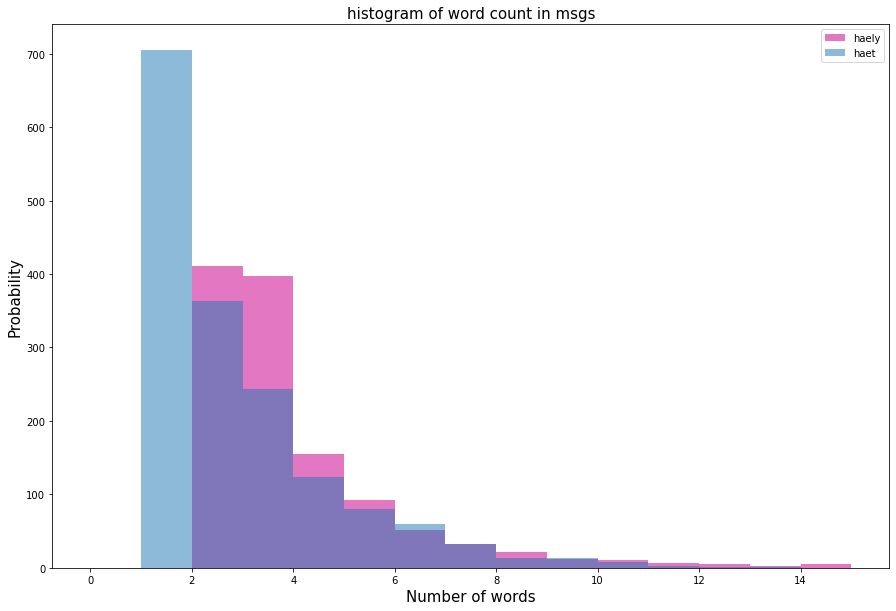

In [13]:
#haely vs haet word count
haely_msgs = pd.Series(haely_df['text'].tolist()).astype(str)
haet_msgs = pd.Series(haet_df['text'].tolist()).astype(str)
dist_haely = haely_msgs.apply(lambda x: len(x.split(' ')))
dist_haet = haet_msgs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_haely, bins=15, range=[0, 15], color=pal[6], label='haely')
plt.hist(dist_haet, bins=15, range=[0, 15], color=pal[0], alpha=0.5, label='haet')
plt.title('histogram of word count in msgs', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('total-haely {:.2f} mean-haely {:.2f} std-haely {:.2f} max-haely {:.2f}'.format(haely_df['number_of_words'].sum(), dist_haely.mean(),
                                                                                      dist_haely.std(), dist_haely.max()))

print('total-haet {:.2f} mean-haet {:.2f} std-haet {:.2f} max-haet {:.2f}'.format(haet_df['number_of_words'].sum(), dist_haet.mean(), 
                                                                                      dist_haet.std(), dist_haet.max()))

total-haely 18381.00 mean-haely 15.13 std-haely 15.59 max-haely 210.00
total-haet 22644.00 mean-haet 13.71 std-haet 18.84 max-haet 497.00


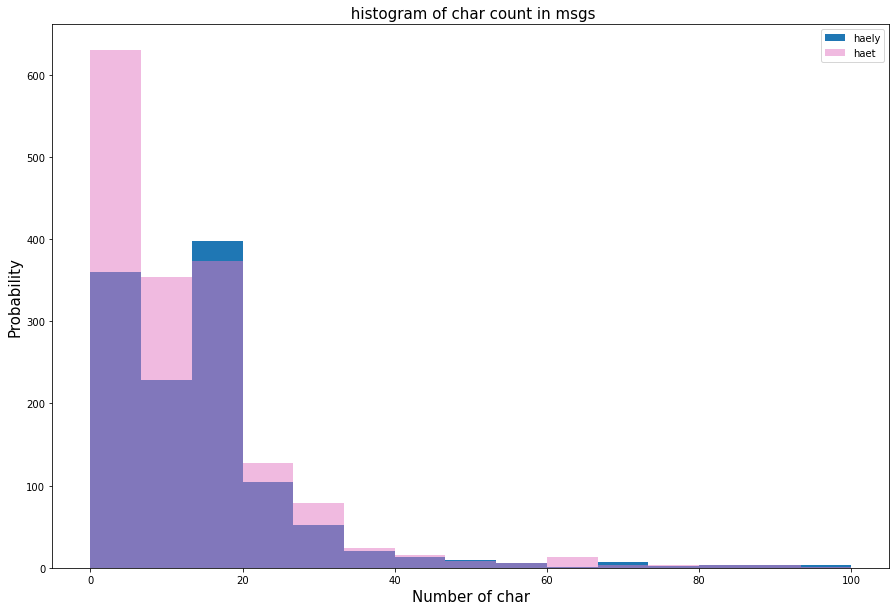

In [14]:
#haely vs haet char count
haely_msgs = pd.Series(haely_df['text'].tolist()).astype(str)
haet_msgs = pd.Series(haet_df['text'].tolist()).astype(str)
dist_haely = haely_msgs.apply(len)
dist_haet = haet_msgs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_haely, bins=15, range=[0, 100], color=pal[0], label='haely')
plt.hist(dist_haet, bins=15, range=[0, 100], color=pal[6], alpha=0.5, label='haet')
plt.title(' histogram of char count in msgs', fontsize=15)
plt.legend()
plt.xlabel('Number of char', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('total-haely {:.2f} mean-haely {:.2f} std-haely {:.2f} max-haely {:.2f}'.format(haely_df['number_of_characters'].sum(), dist_haely.mean(),
                                                                                      dist_haely.std(), dist_haely.max()))

print('total-haet {:.2f} mean-haet {:.2f} std-haet {:.2f} max-haet {:.2f}'.format(haet_df['number_of_characters'].sum(), dist_haet.mean(), 
                                                                                      dist_haet.std(), dist_haet.max()))

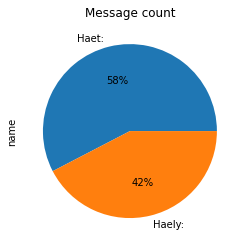

<Figure size 432x288 with 0 Axes>

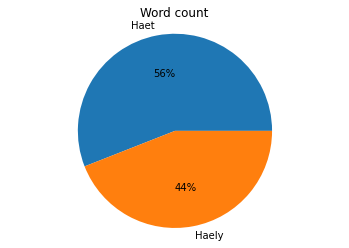

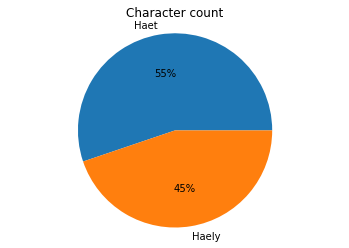

In [15]:
new_df.name.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Message count')


plt.figure(0)
labels = ['Haet', 'Haely']
sizes = [haet_df['number_of_words'].sum(), haely_df['number_of_words'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Word count')

plt.figure(1)
labels = ['Haet', 'Haely']
sizes = [haet_df['number_of_characters'].sum(), haely_df['number_of_characters'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Character count')
plt.show()



In [16]:
# using df_train_vis for all preprcessing
haely_vis = haely_df
haet_vis = haet_df

msgs_haely = haely_vis.shape[0]
msgs_haet = haet_vis.shape[0]
print('total msgs by haely: ', msgs_haely)
print('total msgs by haet: ', msgs_haet)
def avg_word_len(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

haely_vis['avg_word_length'] = haely_vis['text'].apply(lambda x: avg_word_len(x))
print(haely_vis[['text','avg_word_length']].head())

haet_vis['avg_word_length'] = haet_vis['text'].apply(lambda x: avg_word_len(x))
haet_vis[['text','avg_word_length']].head()

total msgs by haely:  1215
total msgs by haet:  1652
                               text  avg_word_length
7    Me ek game download Kari Che\n         3.285714
8               Invite karis take\n         3.750000
16                 ‎image omitted\n         4.333333
18                              😂\n         0.500000
19                             Hi\n         1.000000


<ipython-input-16-b8ed6592adcc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['avg_word_length'] = haely_vis['text'].apply(lambda x: avg_word_len(x))
<ipython-input-16-b8ed6592adcc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_vis['avg_word_length'] = haet_vis['text'].apply(lambda x: avg_word_len(x))


,text,avg_word_length
0,‎Messages to this chat and calls are now secured with end-to-end encryption.\n,5.000000
1,hi\nHum aapke he kon ##\nHO\n,2.375000
2,‎image omitted\n,4.333333
3,‎image omitted\n,4.333333
4,‎video omitted\n,4.333333


In [17]:
#counting stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

haely_vis['stopwords'] = haely_vis['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(haely_vis[['text','stopwords']].head())

                               text  stopwords
7    Me ek game download Kari Che\n          0
8               Invite karis take\n          0
16                 ‎image omitted\n          0
18                              😂\n          0
19                             Hi\n          0


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haelyshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-17-8c9c6c06a2b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['stopwords'] = haely_vis['text'].apply(lambda x: len([x for x in x.split() if x in stop]))


In [18]:
# converting to lowercase
haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


<ipython-input-18-9cf643f067d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-18-9cf643f067d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [19]:
#removing punctuation
haely_vis['text'] = haely_vis['text'].str.replace('[^\w\s]','')
haet_vis['text'] = haet_vis['text'].str.replace('[^\w\s]','')

<ipython-input-19-22428c6bf78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['text'] = haely_vis['text'].str.replace('[^\w\s]','')
<ipython-input-19-22428c6bf78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_vis['text'] = haet_vis['text'].str.replace('[^\w\s]','')


In [20]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
custom_stop = ['ok', 'hello','haha','tu', 'su','im', 'missed', 'call', 'sticker', 'video', 'missed call', 'video call', 'thing', 'people', 'dont', 'image', 'video', 'omitted', 'che', 'ha', 'aa', 'na', 'chu', 'ne', 'nai']
stop+=custom_stop
haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(haet_vis['text'].head())

haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
haely_vis['text'].head()

0    messages chat calls secured endtoend encryption
1                                hi hum aapke kon ho
2                                                   
3                                                   
4                                                   
Name: text, dtype: object


<ipython-input-20-e35c06db7d44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
<ipython-input-20-e35c06db7d44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


7     ek game download kari
8         invite karis take
16                         
18                         
19                       hi
Name: text, dtype: object

In [21]:
# lemmatising text
import nltk
nltk.download('wordnet')
from textblob import Word
haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(haet_vis[['text']].head())
haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
haely_vis[['text']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/haelyshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            text
0  message chat call secured endtoend encryption
1                            hi hum aapke kon ho
2                                               
3                                               
4                                               


<ipython-input-21-d679e17e0abd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_vis['text'] = haet_vis['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
<ipython-input-21-d679e17e0abd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_vis['text'] = haely_vis['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


,text
7,ek game download kari
8,invite karis take
16,
18,
19,hi


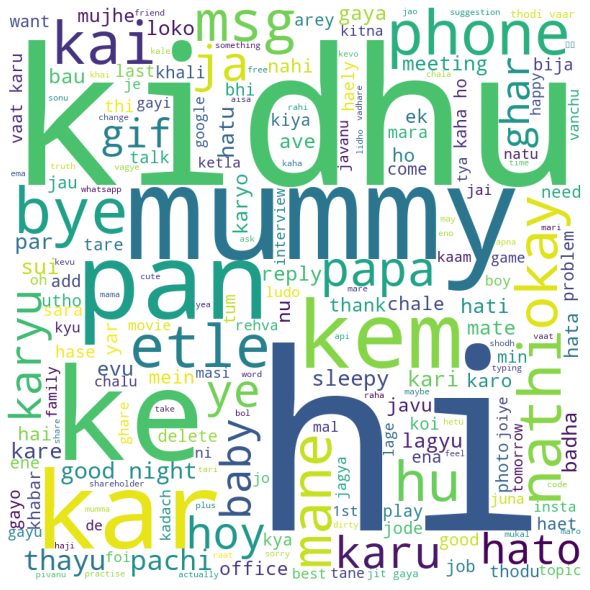

In [22]:
#word cloud for haely
import wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
q_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in haely_vis['text']: 
      
    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        q_words = q_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(q_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


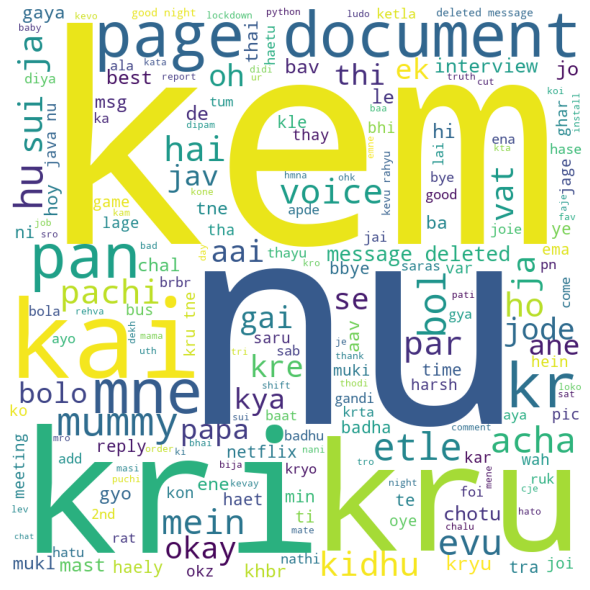

In [23]:
#word cloud for haet
import wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
q_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in haet_vis['text']: 
      
    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        q_words = q_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(q_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()



In [24]:
haely_df.dtypes

time                    datetime64[ns]
name                            object
text                            object
number_of_words                  int64
number_of_characters             int64
avg_word_length                float64
stopwords                        int64
dtype: object

In [25]:
haely_df['time_dif'] = haely_df['time'].diff()

<ipython-input-25-fbb4ae571a38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_df['time_dif'] = haely_df['time'].diff()


In [26]:
haet_df['time_dif'] = haet_df['time'].diff()

<ipython-input-26-d4cc2e3508c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_df['time_dif'] = haet_df['time'].diff()


In [27]:
haely_df.describe()

,number_of_words,number_of_characters,avg_word_length,stopwords,time_dif
count,1215.000000,1215.000000,1215.000000,1215.000000,1214
mean,2.702058,15.128395,2.799393,0.195062,0 days 03:19:15.302306
std,2.758265,15.594955,2.533454,0.898823,0 days 08:22:01.213511
min,1.000000,3.000000,0.500000,0.000000,0 days 00:00:00
25%,1.000000,5.000000,1.333333,0.000000,0 days 00:00:08
50%,2.000000,14.000000,2.666667,0.000000,0 days 00:00:37
75%,3.000000,17.000000,4.000000,0.000000,0 days 01:00:06.500000
max,37.000000,210.000000,46.000000,15.000000,3 days 11:44:22


In [28]:
haet_df.describe()

,number_of_words,number_of_characters,avg_word_length,time_dif
count,1652.000000,1652.000000,1652.000000,1649
mean,2.525424,13.707022,3.044570,0 days 02:26:49.392965
std,2.850604,18.836769,4.678248,0 days 07:03:36.277556
min,1.000000,2.000000,0.500000,0 days 00:00:00
25%,1.000000,4.000000,1.500000,0 days 00:00:05
50%,2.000000,10.000000,2.500000,0 days 00:00:18
75%,3.000000,17.000000,3.333333,0 days 00:14:31
max,77.000000,497.000000,63.500000,3 days 17:10:10


In [30]:
haely_df['time_dif'] = haely_df['time'].diff()
haet_df['time_dif'] = haet_df['time'].diff()

<ipython-input-30-dc9274445866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_df['time_dif'] = haely_df['time'].diff()
<ipython-input-30-dc9274445866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_df['time_dif'] = haet_df['time'].diff()


In [31]:
haely_df.describe()

,number_of_words,number_of_characters,avg_word_length,stopwords,time_dif
count,1215.000000,1215.000000,1215.000000,1215.000000,1214
mean,2.702058,15.128395,2.799393,0.195062,0 days 03:19:15.302306
std,2.758265,15.594955,2.533454,0.898823,0 days 08:22:01.213511
min,1.000000,3.000000,0.500000,0.000000,0 days 00:00:00
25%,1.000000,5.000000,1.333333,0.000000,0 days 00:00:08
50%,2.000000,14.000000,2.666667,0.000000,0 days 00:00:37
75%,3.000000,17.000000,4.000000,0.000000,0 days 01:00:06.500000
max,37.000000,210.000000,46.000000,15.000000,3 days 11:44:22


In [32]:
haet_df.describe()

,number_of_words,number_of_characters,avg_word_length,time_dif
count,1652.000000,1652.000000,1652.000000,1649
mean,2.525424,13.707022,3.044570,0 days 02:26:49.392965
std,2.850604,18.836769,4.678248,0 days 07:03:36.277556
min,1.000000,2.000000,0.500000,0 days 00:00:00
25%,1.000000,4.000000,1.500000,0 days 00:00:05
50%,2.000000,10.000000,2.500000,0 days 00:00:18
75%,3.000000,17.000000,3.333333,0 days 00:14:31
max,77.000000,497.000000,63.500000,3 days 17:10:10


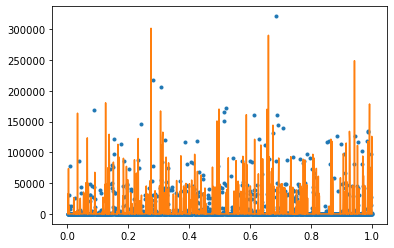

In [39]:
# plot every min
from math import factorial

x0 = range(1, 18967)
x1 = range(1,17000)
y0 = haet_df['time_dif'].tolist()

y1 = haely_df['time_dif'].tolist()


for i in range(len(y0)):
    y0[i]=y0[i].total_seconds()
    if y0[i]<0:
        y0[i]=0
for i in range(len(y1)):
    y1[i]=y1[i].total_seconds()
    if y1[i]<0:
        y1[i]=0

%matplotlib inline
import mpld3
mpld3.enable_notebook()


x0 = np.linspace(0, 1, 1652)
x1 = np.linspace(0, 1, 1215)
plt.plot(x0, y0, '.')
plt.plot(x1, y1,'-')
plt.show()

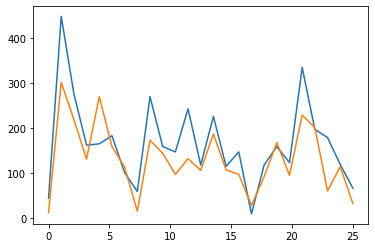

In [43]:
# total words sent by week
from math import factorial
        
y0 = haet_df.resample('W', on='time').number_of_words.sum()
y1 = haely_df.resample('W', on='time').number_of_words.sum()
%matplotlib inline
import mpld3
mpld3.enable_notebook()


x0 = np.linspace(0, 25, 25)
x1 = np.linspace(0, 25, 25)
plt.plot(x0, y0)
plt.plot(x1, y1)
plt.show()


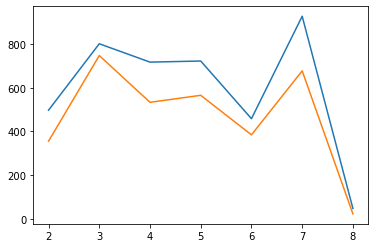

In [46]:
# total words sent by month
from math import factorial
        
y0 = haet_df.resample('M', on='time').number_of_words.sum()
y1 = haely_df.resample('M', on='time').number_of_words.sum()
%matplotlib inline
import mpld3
mpld3.enable_notebook()


x0 = np.linspace(2, 8, 7)
x1 = np.linspace(2, 8, 7)
plt.plot(x0, y0)
plt.plot(x1, y1)
plt.show()


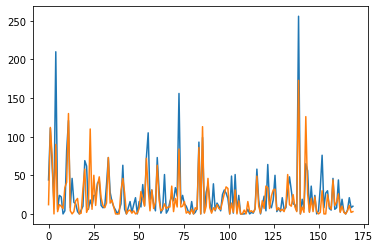

In [48]:
# total words sent by day
from math import factorial
        
y0 = haet_df.resample('D', on='time').number_of_words.sum()
y1 = haely_df.resample('D', on='time').number_of_words.sum()
%matplotlib inline
import mpld3
mpld3.enable_notebook()


x0 = np.linspace(0, 169, 169)
x1 = np.linspace(0, 169, 169)
plt.plot(x0, y0)
plt.plot(x1, y1)
plt.show()


In [50]:
import datetime as dt
haet_df = haet_df.dropna()
haet_df['weekday'] = haet_df['time'].apply(lambda x: dt.datetime.strftime(x, '%A'))
import datetime as dt
haely_df = haely_df.dropna()
haely_df['weekday'] = haely_df['time'].apply(lambda x: dt.datetime.strftime(x, '%A'))

<ipython-input-50-056509954863>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haet_df['weekday'] = haet_df['time'].apply(lambda x: dt.datetime.strftime(x, '%A'))
<ipython-input-50-056509954863>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haely_df['weekday'] = haely_df['time'].apply(lambda x: dt.datetime.strftime(x, '%A'))


In [52]:
sun = haely_df.loc[haely_df['weekday'] == 'Sunday', 'number_of_words'].sum()
mon = haely_df.loc[haely_df['weekday'] == 'Monday', 'number_of_words'].sum()
tue = haely_df.loc[haely_df['weekday'] == 'Tuesday', 'number_of_words'].sum()
wed = haely_df.loc[haely_df['weekday'] == 'Wednesday', 'number_of_words'].sum()
thurs = haely_df.loc[haely_df['weekday'] == 'Thursday', 'number_of_words'].sum()
fri = haely_df.loc[haely_df['weekday'] == 'Friday', 'number_of_words'].sum()
sat = haely_df.loc[haely_df['weekday'] == 'Saturday', 'number_of_words'].sum()


b_sun = haet_df.loc[haet_df['weekday'] == 'Sunday', 'number_of_words'].sum()
b_mon = haet_df.loc[haet_df['weekday'] == 'Monday', 'number_of_words'].sum()
b_tue = haet_df.loc[haet_df['weekday'] == 'Tuesday', 'number_of_words'].sum()
b_wed = haet_df.loc[haet_df['weekday'] == 'Wednesday', 'number_of_words'].sum()
b_thurs = haet_df.loc[haet_df['weekday'] == 'Thursday', 'number_of_words'].sum()
b_fri = haet_df.loc[haet_df['weekday'] == 'Friday', 'number_of_words'].sum()
b_sat = haet_df.loc[haet_df['weekday'] == 'Saturday', 'number_of_words'].sum()

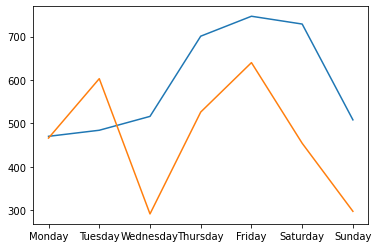

In [53]:
# plot by days - start from mon

hs_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
b_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_hs_words = [mon, tue, wed, thurs, fri, sat, sun]
total_b_words = [b_mon, b_tue, b_wed, b_thurs, b_fri, b_sat, b_sun]
plt.plot(b_days, total_b_words, '-')
plt.plot(hs_days, total_hs_words, '-')
plt.show()